In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(3):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['IND']

In [13]:
team.games

{'week1': <src.game.Game at 0x1a32fd8470>,
 'week2': <src.game.Game at 0x1a32feb128>,
 'week3': <src.game.Game at 0x1a33003e48>,
 'week4': <src.game.Game at 0x10f4ddc50>,
 'week5': <src.game.Game at 0x10f4f4ba8>,
 'week6': <src.game.Game at 0x10f51f908>,
 'week7': <src.game.Game at 0x10f5341d0>,
 'week8': <src.game.Game at 0x10f54e908>,
 'week10': <src.game.Game at 0x10f572710>,
 'week11': <src.game.Game at 0x10f585c50>,
 'week12': <src.game.Game at 0x10f5a01d0>,
 'week13': <src.game.Game at 0x10f5bb3c8>,
 'week14': <src.game.Game at 0x10f5ca668>,
 'week15': <src.game.Game at 0x10f5e5470>,
 'week16': <src.game.Game at 0x10f5ef9b0>,
 'week17': <src.game.Game at 0x1a23fd1908>}

In [14]:
team.process_weeks(weeks)

/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/sr

In [111]:
game = team.games['week1']
game.list_plays()

Play 1: (14:11) (Shotgun) A.Dalton pass short left intended for J.Mixon INTERCEPTED by K.Moore II at CIN 39. K.Moore II to CIN 7 for 32 yards (A.Dalton).
Play 2: (12:32) A.Dalton pass short right to T.Eifert pushed ob at CIN 40 for 29 yards (M.Hooker).
Play 3: (11:17) (Shotgun) A.Dalton pass short left to J.Mixon to IND 32 for 21 yards (C.Geathers).
Play 4: (9:58) A.Dalton pass short right to A.Green to IND 22 for 5 yards (N.Hairston).
Play 5: (8:35) (Shotgun) A.Dalton pass incomplete deep right to J.Ross.
Play 6: (8:30) (Shotgun) A.Dalton pass incomplete short middle to T.Boyd (J.Sheard).
Play 7: (1:23) A.Dalton pass short right to J.Mixon to CIN 33 for 8 yards (N.Hairston).
Play 8: (:58) (No Huddle, Shotgun) A.Dalton pass short right to T.Kroft to CIN 42 for 9 yards (A.Walker, D.Leonard).
Play 9: (:11) (Shotgun) A.Dalton pass short left to A.Green to IND 45 for 13 yards (M.Farley). FUMBLES (M.Farley), touched at IND 45, RECOVERED by IND-D.Leonard at IND 42. D.Leonard to IND 42 for no

In [112]:
for play in game.plays:
    play.process_players(players)
    if play.hasForwardPass:
        play.find_dropback_events()

In [340]:
play_number = 6

In [341]:
verbose = True

In [342]:
play = game.plays[play_number - 1]

In [343]:
play.play_data

gameId                                                           2018090902
playId                                                                  372
playDescription           (8:30) (Shotgun) A.Dalton pass incomplete shor...
quarter                                                                   1
down                                                                      3
yardsToGo                                                                12
possessionTeam                                                          CIN
playType                                                     play_type_pass
yardlineSide                                                            IND
yardlineNumber                                                           24
offenseFormation                                                    SHOTGUN
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         6
numberOfPass

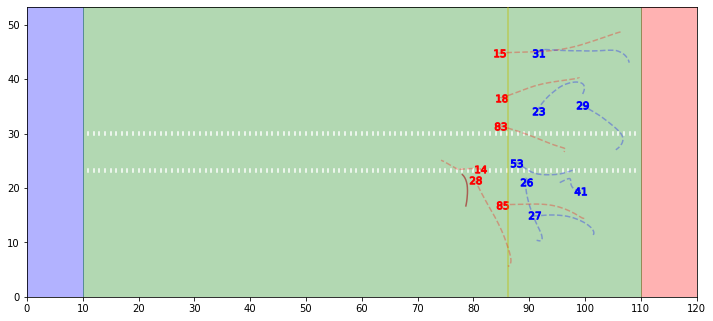

In [344]:
play.plot_play(markers='number')

In [345]:
play.find_initial_locks(verbose=verbose)

Quincy Wilson (CB-31) - Distance to Line: 5.9
  Horizontal distance to John Ross = 0.5
    Quincy Wilson (CB-31) covering John Ross (WR-15)
  Horizontal distance to Tyler Boyd = 14.0
Malik Hooker (FS-29) - Distance to Line: 13.4
  Horizontal distance to A.J. Green = -1.3
  Horizontal distance to Tyler Boyd = 3.9
Kenny Moore II (CB-23) - Distance to Line: 5.3
  Horizontal distance to A.J. Green = -2.5
  Horizontal distance to Tyler Boyd = 2.8
Darius Leonard (LB-53) - Distance to Line: 1.5
  Horizontal distance to A.J. Green = -11.9
  Horizontal distance to Tyler Boyd = -6.6
Nate Hairston (CB-27) - Distance to Line: 4.7
  Horizontal distance to Tyler Eifert = -2.0
  Horizontal distance to Joe Mixon = -6.6
Matthias Farley (SS-41) - Distance to Line: 13.0
  Horizontal distance to Tyler Eifert = 2.5
  Horizontal distance to Joe Mixon = -2.1
Clayton Geathers (FS-26) - Distance to Line: 3.4
  Horizontal distance to Tyler Eifert = 4.7
  Horizontal distance to Joe Mixon = 0.2
Quincy Wilson (CB-

In [346]:
play.find_blitz()

In [347]:
play.find_zone_locations()

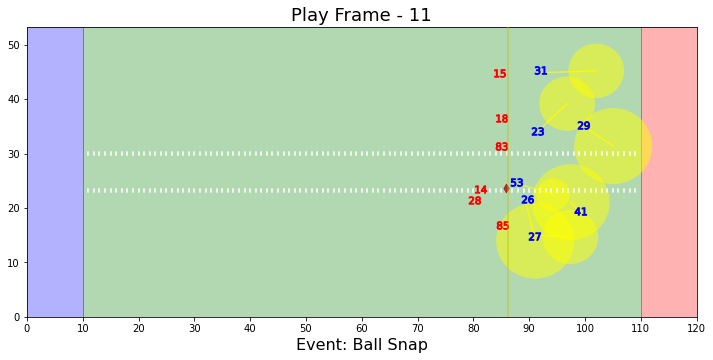

In [348]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='number')

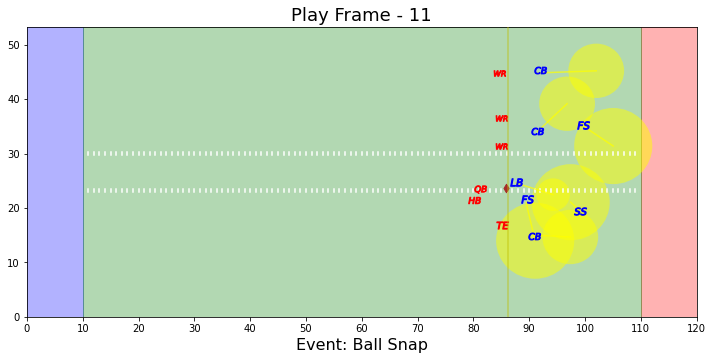

In [349]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='position')

In [351]:
db = play.return_player_by_number(27)

In [352]:
db.zone_loc[0] - play.line_of_scrimmage

11.210000000000008

In [353]:
db.distance_from_center(play.events['pass_forward'])

-8.96

In [101]:
#dst = os.path.join(basepath,'coverages',team.abbr,game.info,f'Play {play_number}','images')

In [27]:
#play.plot_play_frames(markers='number',show_coverage=True,target_directory=dst)